In [4]:
import json

IN = "cars_fb.jsonl"

cars = []
with open(IN) as f:
    for l in f:
        cars.append(json.loads(l))


In [5]:
print(len(cars))

63931


In [6]:
seller_ct = {}
price = []
make_ct = {}
model_ct = {}

In [7]:
def add(d, k):
    if k in d:
        d[k] = d[k] + 1
    else:
        d[k] = 0
    return d

for car in cars:
    add(seller_ct, car["seller"])
    add(make_ct, car["make-name"])
    add(model_ct, car["model-name"])
    if(car["price"] and car["price"] != ''):
        price.append(int(car["price"]))

In [49]:
#sort makes
make_list=sorted(make_ct.items(), key=lambda make_ct:make_ct[1], reverse=True)
# for l in make_list:
#     print(l[0])

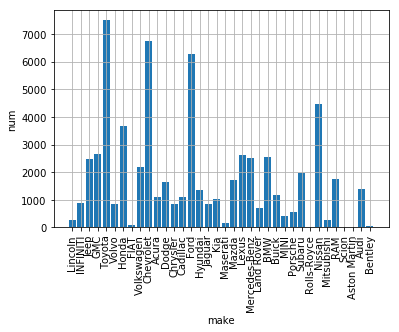

In [50]:
import matplotlib.pyplot as plt
bars = plt.bar(range(len(make_ct)), make_ct.values(), width=0.8)
plt.xticks(range(len(make_ct)), make_ct.keys(), rotation=90 )
plt.xlabel('make', rotation='horizontal')
plt.ylabel('num', rotation='vertical')
plt.grid(True)
plt.figure(num=None, figsize=(8, 6), dpi=500, facecolor='w', edgecolor='k')
plt.show()

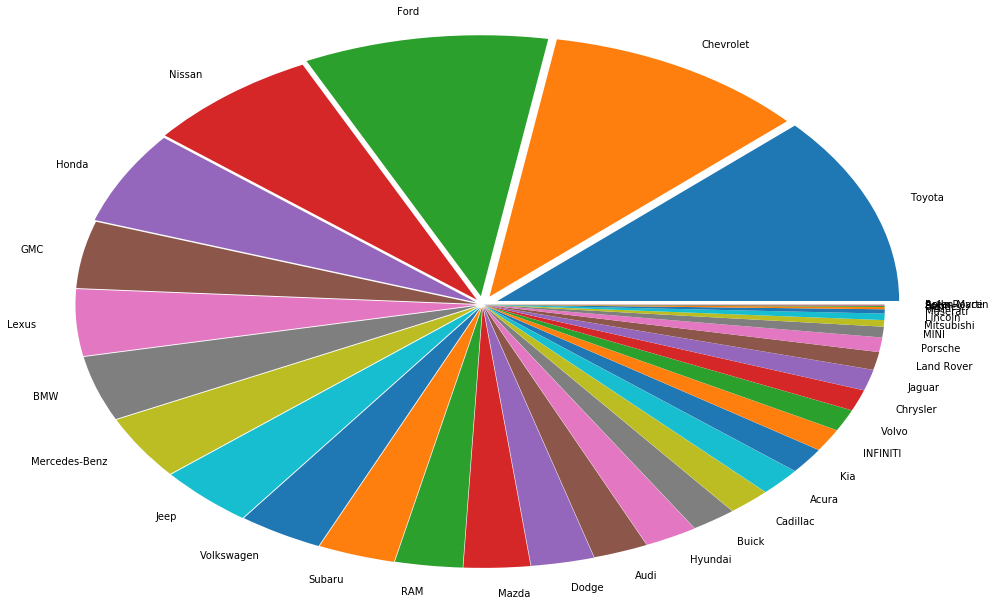

In [59]:
import matplotlib.pyplot as plt
vals= [l[1] for l in make_list]
s = sum(vals)
fractions = [v/s for v in vals]
makes = [l[0] for l in make_list]
make_shares = plt.pie(x = vals, explode=fractions, labels=makes, radius = 3)
plt.show()

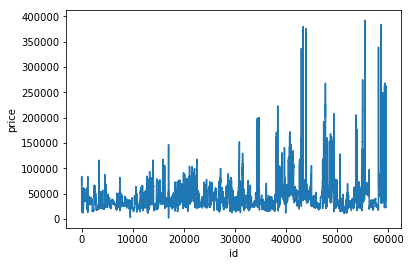

In [24]:
lines = plt.plot(price)
plt.ylabel('price')
plt.xlabel('id')
plt.show()

In [141]:
price_range = [p for p in range(5000, max(price) - 300000, 5000)]
price_range.append(400000)
count = [0] * len(price_range)
for p in price:
    i = 0
    while p > price_range[i]:
        i+=1
    count[i] += 1

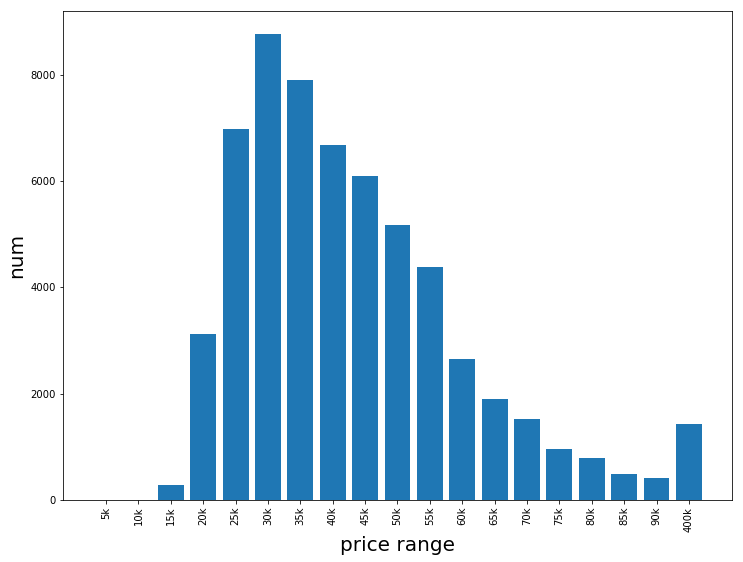

In [145]:
import matplotlib.pyplot as plt
plt.bar(range(len(count)), count,width=0.8)
plt.xticks(range(len(price_range)), [ str(int(p/1000)) + 'k' for p in price_range], rotation=90 ,size =10)
plt.xlabel('price range', rotation='horizontal', size=20)
plt.ylabel('num', rotation='vertical',  size=20)
plt.rcParams["figure.figsize"] = [12,9]
plt.show()